<a href="https://colab.research.google.com/github/ritikarana9999/Fractals/blob/main/Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
print("PyTorch Version:", torch.__version__)


PyTorch Version: 2.0.1+cu118


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
#part 1
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]


In [ ]:
x = torch.Tensor(X)
y = torch.Tensor(Y)


In [ ]:
x = x.to(device)
y = y.to(device)

In [ ]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)


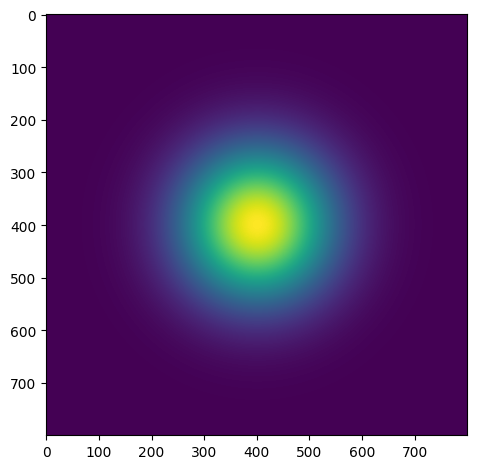

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z.numpy())
plt.tight_layout()
plt.show()


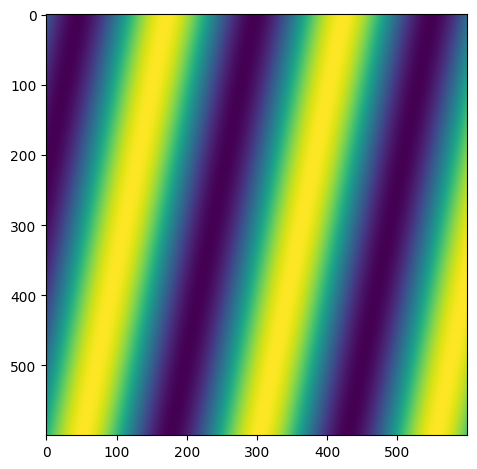

In [ ]:
# Compute 2D sine function
Xf = 5.0
Yf = 1.0
amp= 1.0
ph =0.0
z = amp*torch.sin(Xf*x +Yf*y + ph)

import matplotlib.pyplot as plt
plt.imshow(z.numpy())
plt.tight_layout()
plt.show()


In [ ]:
# # Compute 2D cosine function
# Xf = 1.0
# Yf = 1.0
# amp= 1.0
# ph =0.0
# z = amp*torch.cos(Xf*x +Yf*y + ph)

# import matplotlib.pyplot as plt
# plt.imshow(z.cpu().numpy())
# plt.tight_layout()
# plt.show()


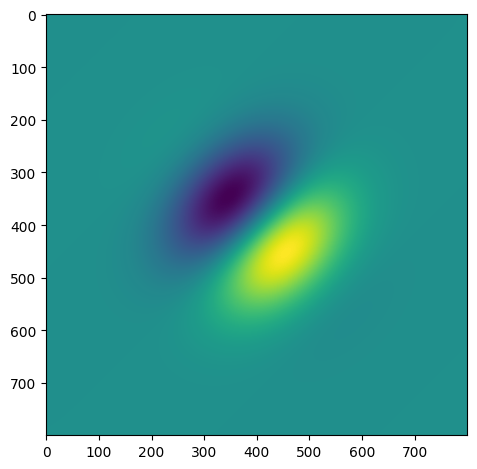

In [ ]:
# Compute Gaussian
gaussian = torch.exp(-(x**2 + y**2) / 2.0)

# Compute 2D sine function
sine = amp*torch.sin(Xf*x +Yf*y + ph)

# Multiply Gaussian and sine functions together
result = gaussian * sine

import matplotlib.pyplot as plt
plt.imshow(result.cpu().numpy())
plt.tight_layout()
plt.show()

In [ ]:
#part 2

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]


In [ ]:
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

In [ ]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)


In [ ]:
for i in range(200):
  zs_ = zs*zs + z
  not_diverged = torch.abs(zs_) < 4.0
  ns += not_diverged
  zs = zs_

<ipython-input-52-e760b6229622>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


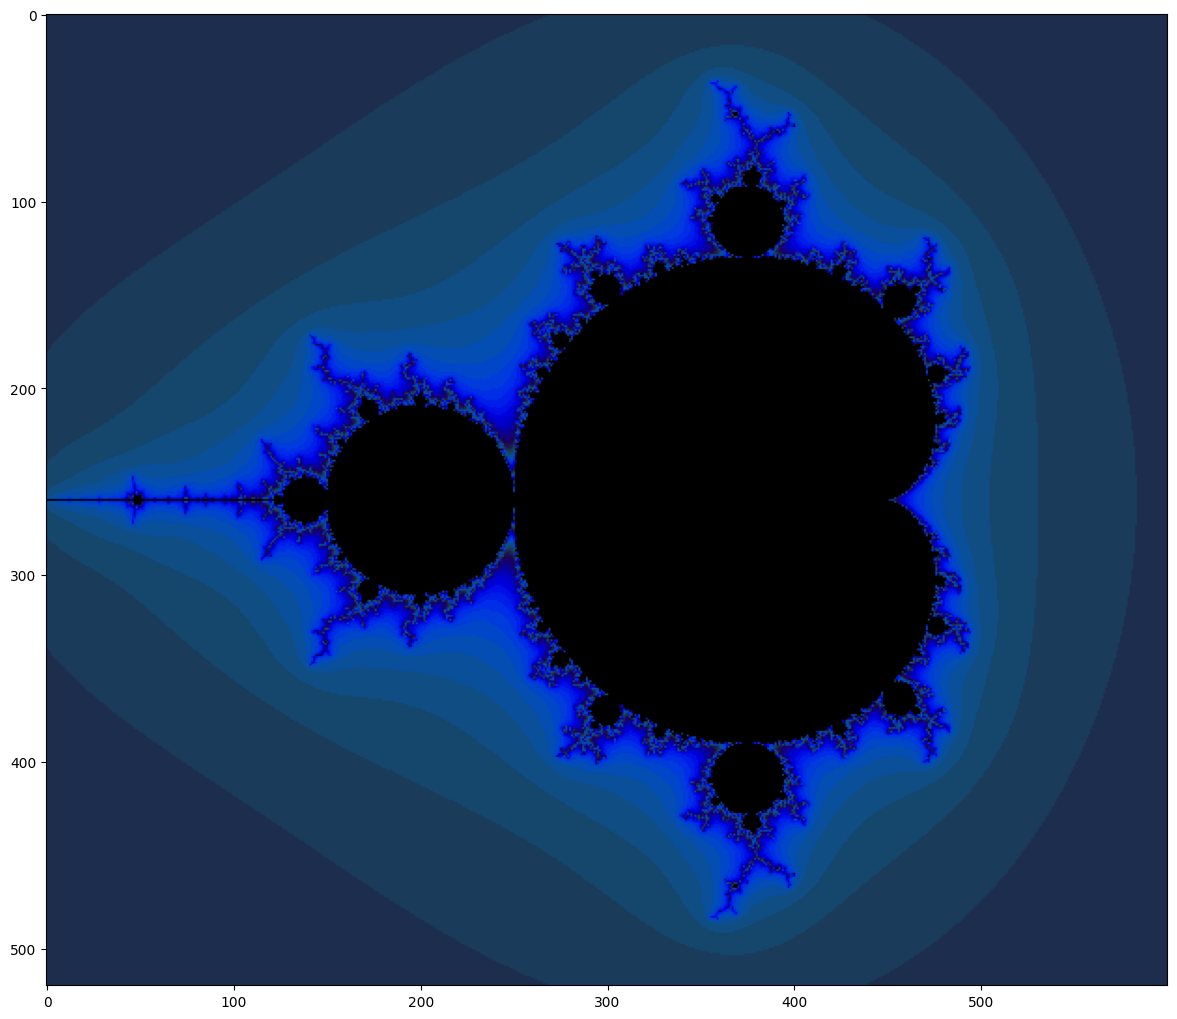

In [ ]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


PyTorch Version: 2.0.1+cu118


<ipython-input-64-3ce14c176ef1>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


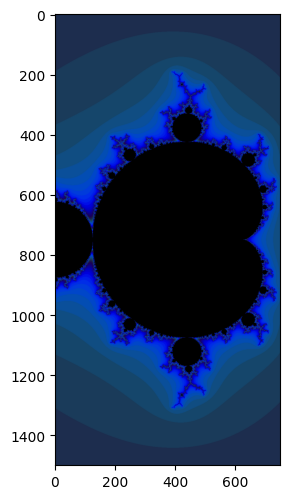

In [ ]:
# import torch
# import numpy as np

# print("PyTorch Version:", torch.__version__)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Decrease mgrid spacing for higher resolution
# Y, X = np.mgrid[-1.5:1.5:0.002, -1:0.5:0.002]

# x = torch.Tensor(X)
# y = torch.Tensor(Y)

# x = x.to(device)
# y = y.to(device)

# # Compute initial complex numbers on the grid
# z = torch.complex(x, y)
# zs = z.clone()
# ns = torch.zeros_like(z)

# # Transfer to the GPU device
# z = z.to(device)
# zs = zs.to(device)
# ns = ns.to(device)

# # Set the maximum number of iterations
# max_iterations = 200

# # Iterate to compute the Mandelbrot fractal
# for i in range(max_iterations):
#     zs_ = zs * zs + z
#     not_diverged = torch.abs(zs_) < 4.0
#     ns += not_diverged
#     zs = zs_

# # Plot the resulting high-resolution fractal image
# import matplotlib.pyplot as plt

# def processFractal(a):
#     """Display an array of iteration counts as a
#     colorful picture of a fractal."""
#     a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
#     img = np.concatenate([10 + 20 * np.cos(a_cyclic),
#                           30 + 50 * np.sin(a_cyclic),
#                           155 - 80 * np.cos(a_cyclic)], 2)
#     img[a == a.max()] = 0
#     a = img
#     a = np.uint8(np.clip(a, 0, 255))
#     return a

# plt.imshow(processFractal(ns.cpu().numpy()))
# plt.tight_layout(pad=0)
# plt.show()


<ipython-input-64-3ce14c176ef1>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


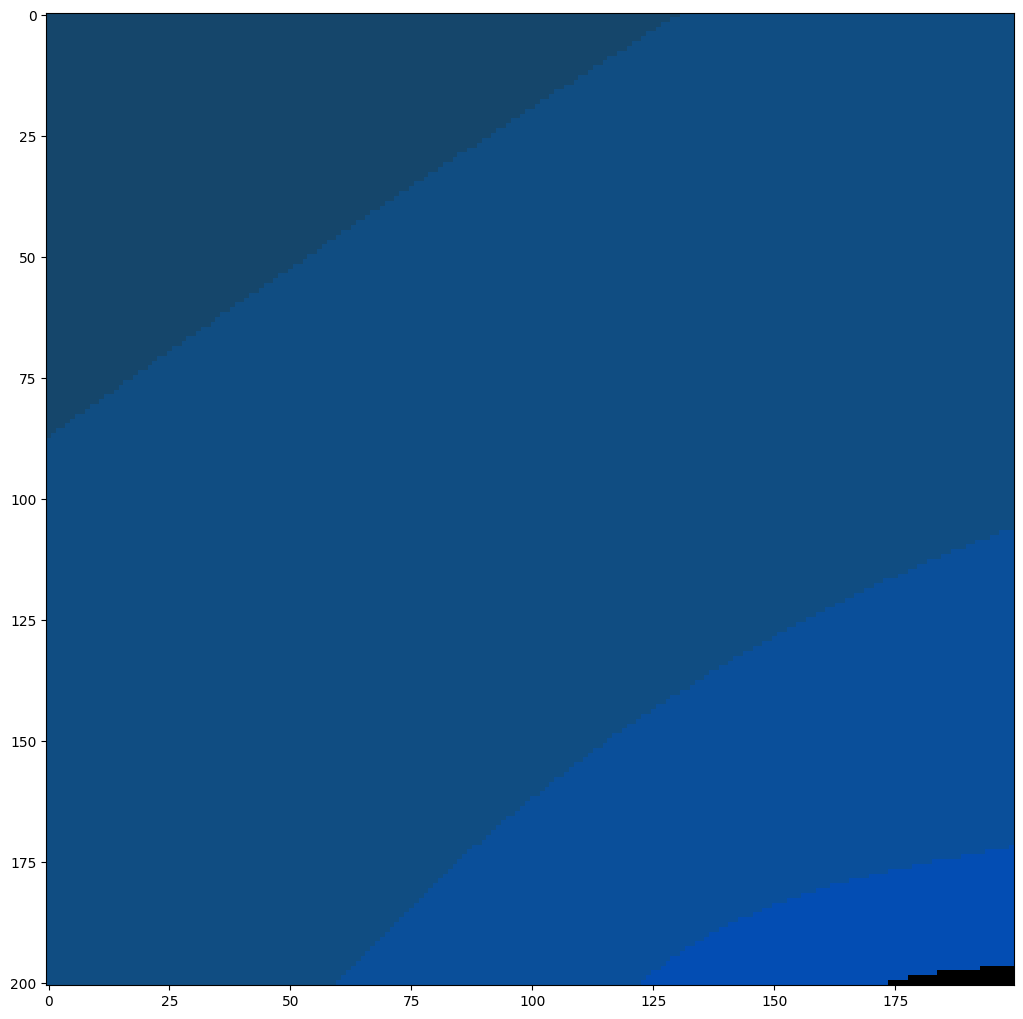

In [ ]:
# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a 2D array of complex numbers on a smaller region
# Y, X = np.mgrid[-0.8:-0.7:0.0005, -0.7:-0.6:0.0005]

# # ... Rest of your code ...

# # Update the grid resolution and position
# x = torch.Tensor(X)
# y = torch.Tensor(Y)
# z = torch.complex(x, y)
# zs = z.clone()
# ns = torch.zeros_like(z)

# # ... Rest of your code ...

# # Mandelbrot Set
# for i in range(200):
#     zs_ = zs * zs + z
#     not_diverged = torch.abs(zs_) < 4.0
#     ns += not_diverged
#     zs = zs_

# # Plot the result with high resolution
# fig = plt.figure(figsize=(16, 10))
# plt.imshow(processFractal(ns.cpu().numpy()))
# plt.tight_layout(pad=0)
# plt.show()


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

center_x = -1.24
center_y = -0.025
zoom_factor = 1

range_x = zoom_factor * 0.05
range_y = zoom_factor * 0.05
spacing = 0.00001

#new meshgrid
Y, X = np.mgrid[center_y - range_y : center_y + range_y : spacing,
                center_x - range_x : center_x + range_x : spacing]

#loading
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

# Transfer to the GPU device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(500):
    # Compute values of z: z^2 + c
    zs_ = zs * zs + z
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_

def processFractal(a):
    magnitude = torch.abs(a)
    a_cyclic = (6.28 * magnitude / 20.0).unsqueeze(-1)
    img = torch.cat([10 + 20 * torch.cos(a_cyclic),
                     30 + 50 * torch.sin(a_cyclic),
                     155 - 80 * torch.cos(a_cyclic)], 2)
    img[magnitude == magnitude.max()] = 0
    a = img
    a = np.uint8(np.clip(a.cpu().numpy(), 0, 255))
    return a

# Plot
fig = plt.figure(figsize=(10, 8))
plt.imshow(processFractal(ns))
plt.title("Zoomed Mandelbrot Set")
plt.tight_layout(pad=0)
plt.show()

KeyboardInterrupt: ignored

<ipython-input-64-3ce14c176ef1>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


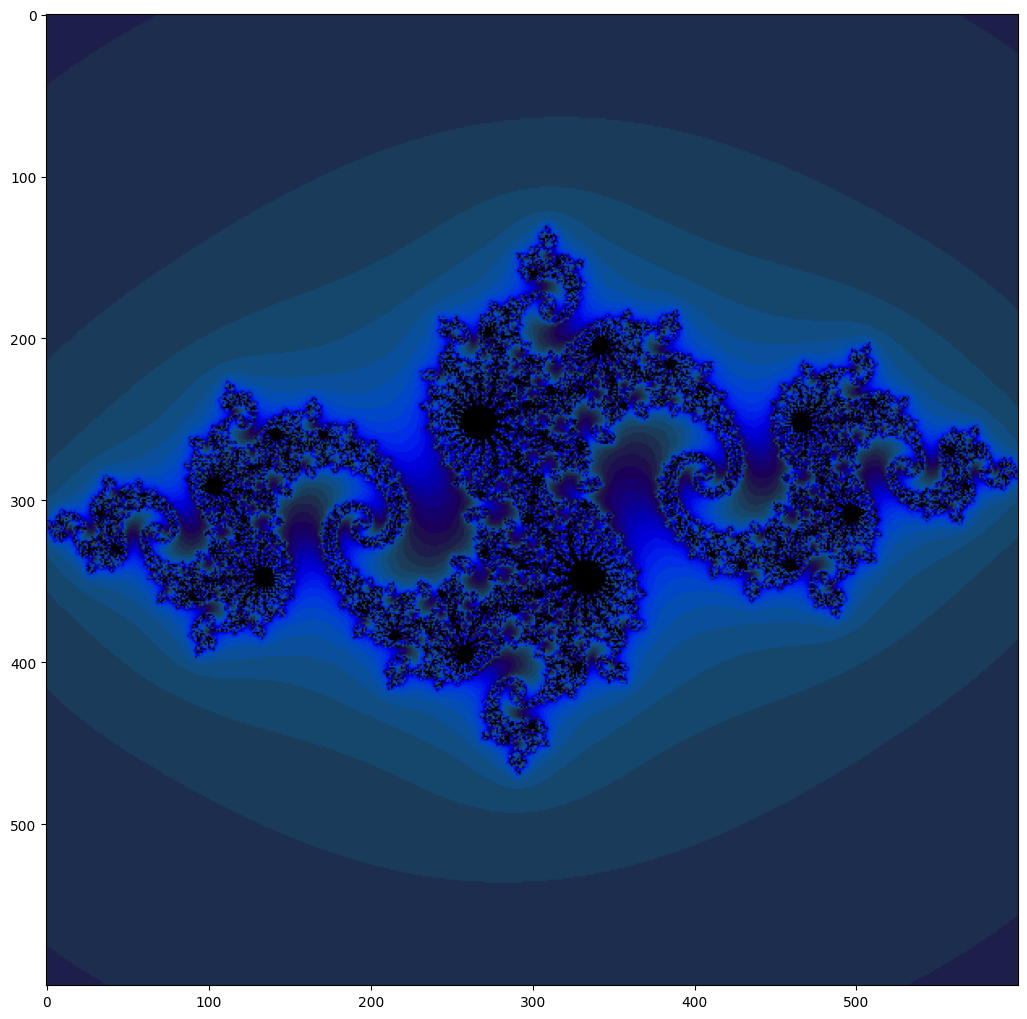

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#grid coordinates
Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]

x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)

#constant complex number for the Julia set
c = torch.complex(torch.tensor(-0.8), torch.tensor(0.156))

#Julia Set
for i in range(200):
    zs_ = zs * zs + c
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

#Plot
fig = plt.figure(figsize=(16, 10))
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


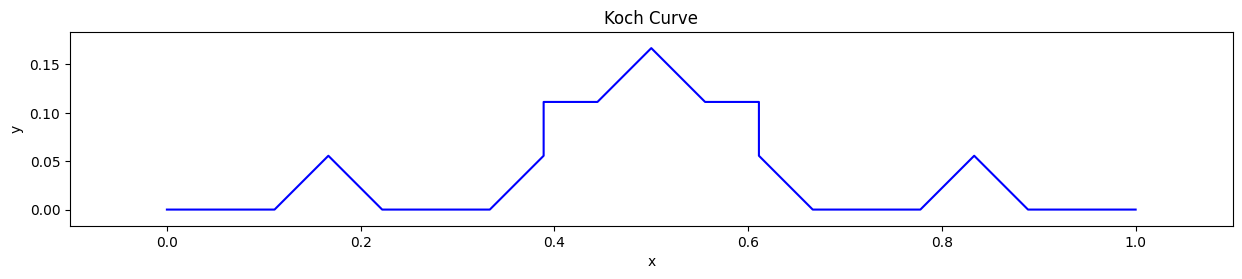

In [ ]:
# part3
import torch
import matplotlib.pyplot as plt

def koch_curve(p1, p2, n_iterations):
    if n_iterations == 0:
        return [p1, p2]

    #intermediate points
    v = p2 - p1
    p3 = p1 + v / 3
    p4 = p1 + v / 2 + torch.tensor([-v[1], v[0]]) / 6
    p5 = p1 + 2 * v / 3

    segment1 = koch_curve(p1, p3, n_iterations - 1)
    segment2 = koch_curve(p3, p4, n_iterations - 1)
    segment3 = koch_curve(p4, p5, n_iterations - 1)
    segment4 = koch_curve(p5, p2, n_iterations - 1)

    return segment1 + segment2 + segment3 + segment4

#initial points
p1 = torch.tensor([0.0, 0.0])
p2 = torch.tensor([1.0, 0.0])

#Generating points
n_iterations = 2
koch_points = koch_curve(p1, p2, n_iterations)

koch_points = torch.stack(koch_points)

x_scale = torch.max(koch_points[:, 0]) - torch.min(koch_points[:, 0])
y_scale = torch.max(koch_points[:, 1]) - torch.min(koch_points[:, 1])

#plot
plt.figure(figsize=(15, 7))
plt.plot(koch_points[:, 0].numpy(), koch_points[:, 1].numpy(), color='blue')
plt.title("Koch Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(torch.min(koch_points[:, 0]) - x_scale * 0.1, torch.max(koch_points[:, 0]) + x_scale * 0.1)
plt.ylim(torch.min(koch_points[:, 1]) - y_scale * 0.1, torch.max(koch_points[:, 1]) + y_scale * 0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
